In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## 1. Write a program that solves using (a) Euler and (b) RK 4th order methods the Newton’s equation of motion for a damped harmonic oscillator:

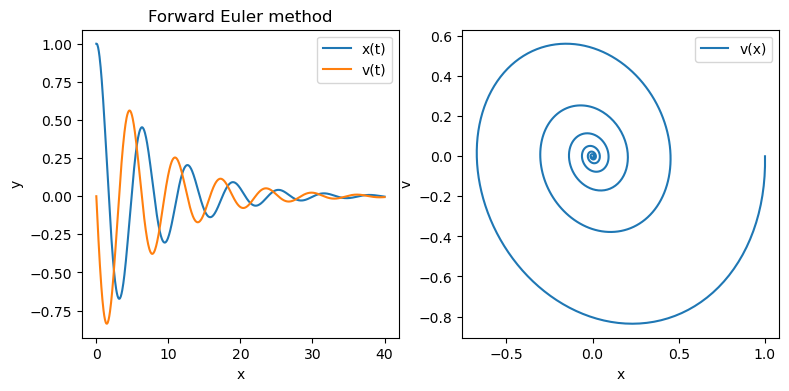

In [2]:
def forward_Euler(y1, y2, h):
    return np.array([y1, y2]) + h*np.array([y2, -y1-0.3*y2])


h=0.05
xPlot = np.arange(0, 40+h, h)
y1 = np.zeros(len(xPlot))
y2 = np.zeros(len(xPlot))
y1[0]=1.
y2[0]=0.
for i in range(1, len(xPlot)):
    y1[i] = forward_Euler(y1[i-1], y2[i-1], h)[0]
    y2[i] = forward_Euler(y1[i-1], y2[i-1], h)[1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (9, 4))

ax[0].plot(xPlot, y1, label = 'x(t)')
ax[0].plot(xPlot, y2, label = 'v(t)')
ax[1].plot(y1, y2, label = 'v(x)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('v')
ax[0].set_title('Forward Euler method')
ax[0].legend()
ax[1].legend()

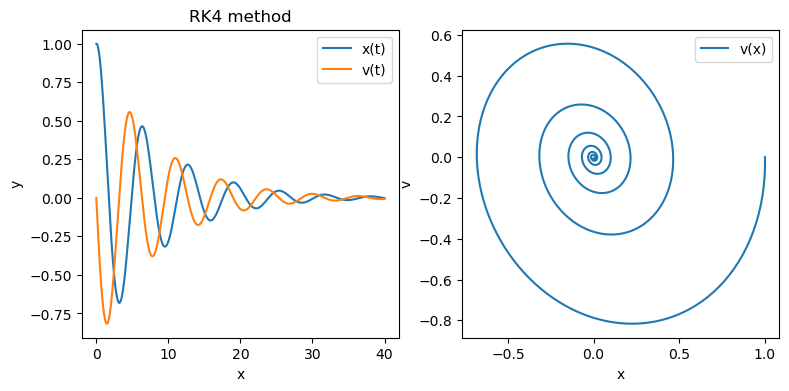

In [3]:
def RK4(y1, y2, h):
    k11 = y2
    k12 = y2 + h*k11/2
    k13 = y2 + h*k12/2
    k14 = y2+h*k13
    k21 = -y1-0.3*y2
    k22 = -(y1+h*k21/2)-0.3*(y2+h*k21/2)
    k23 =  -(y1+h*k22/2)-0.3*(y2+h*k22/2)
    k24 =  -(y1+h*k23)-0.3*(y2+h*k23)
    return np.array([y1, y2]) + h*np.array([(k11+2*k12+2*k13+k14), (k21+2*k22+2*k23+k24)])/6

h=0.05
xPlot = np.arange(0, 40+h, h)
y1 = np.zeros(len(xPlot))
y2 = np.zeros(len(xPlot))
y1[0]=1.
y2[0]=0.
for i in range(1, len(xPlot)):
    y1[i] = RK4(y1[i-1], y2[i-1], h)[0]
    y2[i] = RK4(y1[i-1], y2[i-1], h)[1]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (9, 4))
ax[0].plot(xPlot, y1, label = 'x(t)')
ax[0].plot(xPlot, y2, label = 'v(t)')
ax[1].plot(y1, y2, label = 'v(x)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('v')
ax[0].set_title('RK4 method')
ax[0].legend()
ax[1].legend()

## 2 Write a program to solve the following coupled differential equations

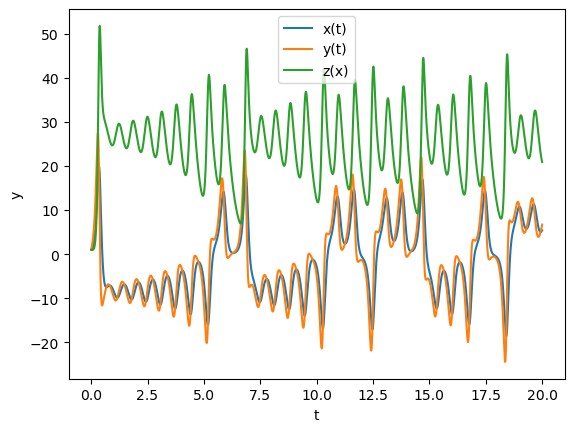

In [2]:
def Raltson(x0, y0, z0, x, y, z, h):
    sigma = 10
    rho  = 28
    beta = 8/3
    k11 = h*sigma*(y - x)
    k12 = h*sigma*((y+2*k11/3) - (x +2*k11/3))
    k21 = h*(x*(rho - z) - y)
    k22 = h*((x+2*k21/3)*(rho - (z+2*k21/3)) - (y+2*k21/3))
    k31 = h*(x*y - beta*z)
    k32 = h*((x+2*k31/3)*(y+2*k31/3) - beta*(z+2*k31/3))
    return np.array([x, y, z]) + np.array([(k11/4+3*k12/4), (k21/4+3*k22/4), (k31/4+3*k32/4)])
             

h=0.005
xPlot = np.arange(0, 20+h, h)
x = np.zeros(len(xPlot))
y = np.zeros(len(xPlot))
z = np.zeros(len(xPlot))
x0=y0=z0=1.
x[0]=x0
y[0]=y0
z[0]=z0
for i in range(1, len(xPlot)):
    x[i] = Raltson(x0, y0, z0, x[i-1], y[i-1], z[i-1], h)[0]
    y[i] = Raltson(x0, y0, z0, x[i-1], y[i-1], z[i-1], h)[1]
    z[i] = Raltson(x0, y0, z0, x[i-1], y[i-1], z[i-1], h)[2]
    
plt.plot(xPlot, x, label = 'x(t)')
plt.plot(xPlot,y, label = 'y(t)')
plt.plot(xPlot, z, label = 'z(x)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

Text(0, 0.5, 'y')

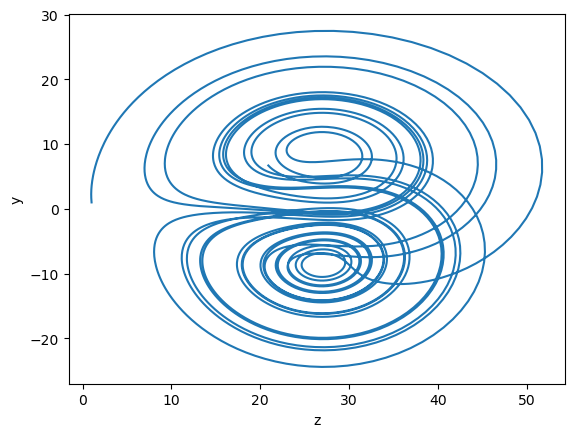

In [3]:
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y')

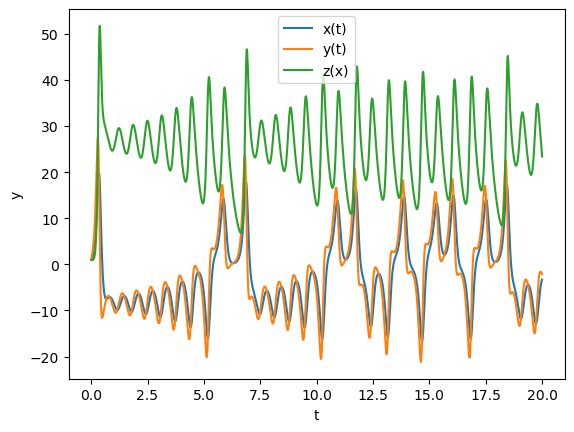

In [4]:
x0=1.005
y0=1.
z0=1.
x[0]=x0
y[0]=y0
z[0]=z0
for i in range(1, len(xPlot)):
    x[i] = Raltson(x0, y0, z0, x[i-1], y[i-1], z[i-1], h)[0]
    y[i] = Raltson(x0, y0, z0, x[i-1], y[i-1], z[i-1], h)[1]
    z[i] = Raltson(x0, y0, z0, x[i-1], y[i-1], z[i-1], h)[2]
    
plt.plot(xPlot, x, label = 'x(t)')
plt.plot(xPlot,y, label = 'y(t)')
plt.plot(xPlot, z, label = 'z(x)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

Text(0, 0.5, 'y')

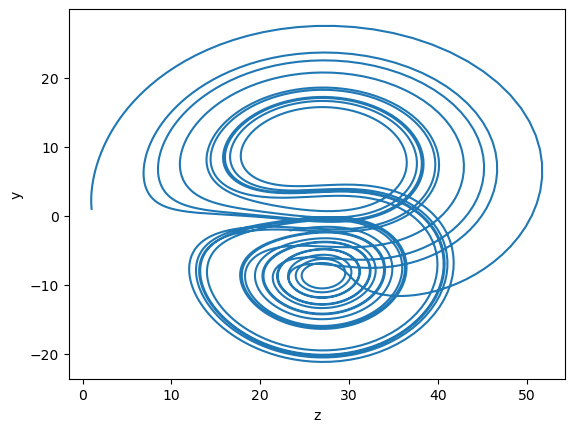

In [5]:
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y')

when taking $x(0)=1.005, y(0)=z(0)=1.$, we notice that the internal lines on the curve of y(z) are almost relgularly separated between each other. But with $x(0)=1., y(0)=z(0)=1$, the internal lines are almost quite separated or forming small groups.